In [145]:
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [146]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings('ignore')

In [147]:
# Reading the data
health_data=pd.read_csv("health care diabetes.csv")

# checking the shape of the data
health_data.shape

(768, 9)

#### Our data has 9 columns or features and 768 observations

In [148]:
# Checking the first five rows of the data
health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
# Checking the last five rows of the data
health_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [150]:
# we will check the descriptive statistics of the data
health_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Some key observations:
1. From the above dataset we get to know that the avg age for the people in the study is around 33 years
2. The range of the age of the patients under study is 60 years with minimum of 21 and maximum of 81.
3. We have some unsual data in Glocose , bloodpressure,Skinthickness,insulin and BMI with 0 values
4. We also have some usual data in pregnancies with maximum amount of pregnecies as 17

In [151]:
# finding the information about the data
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### There are no null values but we have some 0's as per the observations, so first we will remove thse zero's with median        

In [152]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    health_data[i].replace(0,health_data[i].median(),inplace=True)

In [153]:
health_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### We have some unsual data in Pregnancy also, We will do necessary forfor that as well

In [154]:
# defining function to bin the data
def binning(x):
    if x>=1 and x<=3:
        return 2
    elif x>3 and x<=5:
        return 4
    else:
        return 5

In [155]:
# Applying the above defined function
health_data['Pregnancy_new']=health_data['Pregnancies'].apply(lambda x: binning(x))

In [156]:
# we will check if the function works
health_data['Pregnancy_new'].value_counts()

Pregnancy_new
5    330
2    313
4    125
Name: count, dtype: int64

In [157]:
# We will drop the Pregnancies columns
health_data.drop('Pregnancies',axis=1,inplace=True)

In [158]:
health_data.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancy_new'],
      dtype='object')

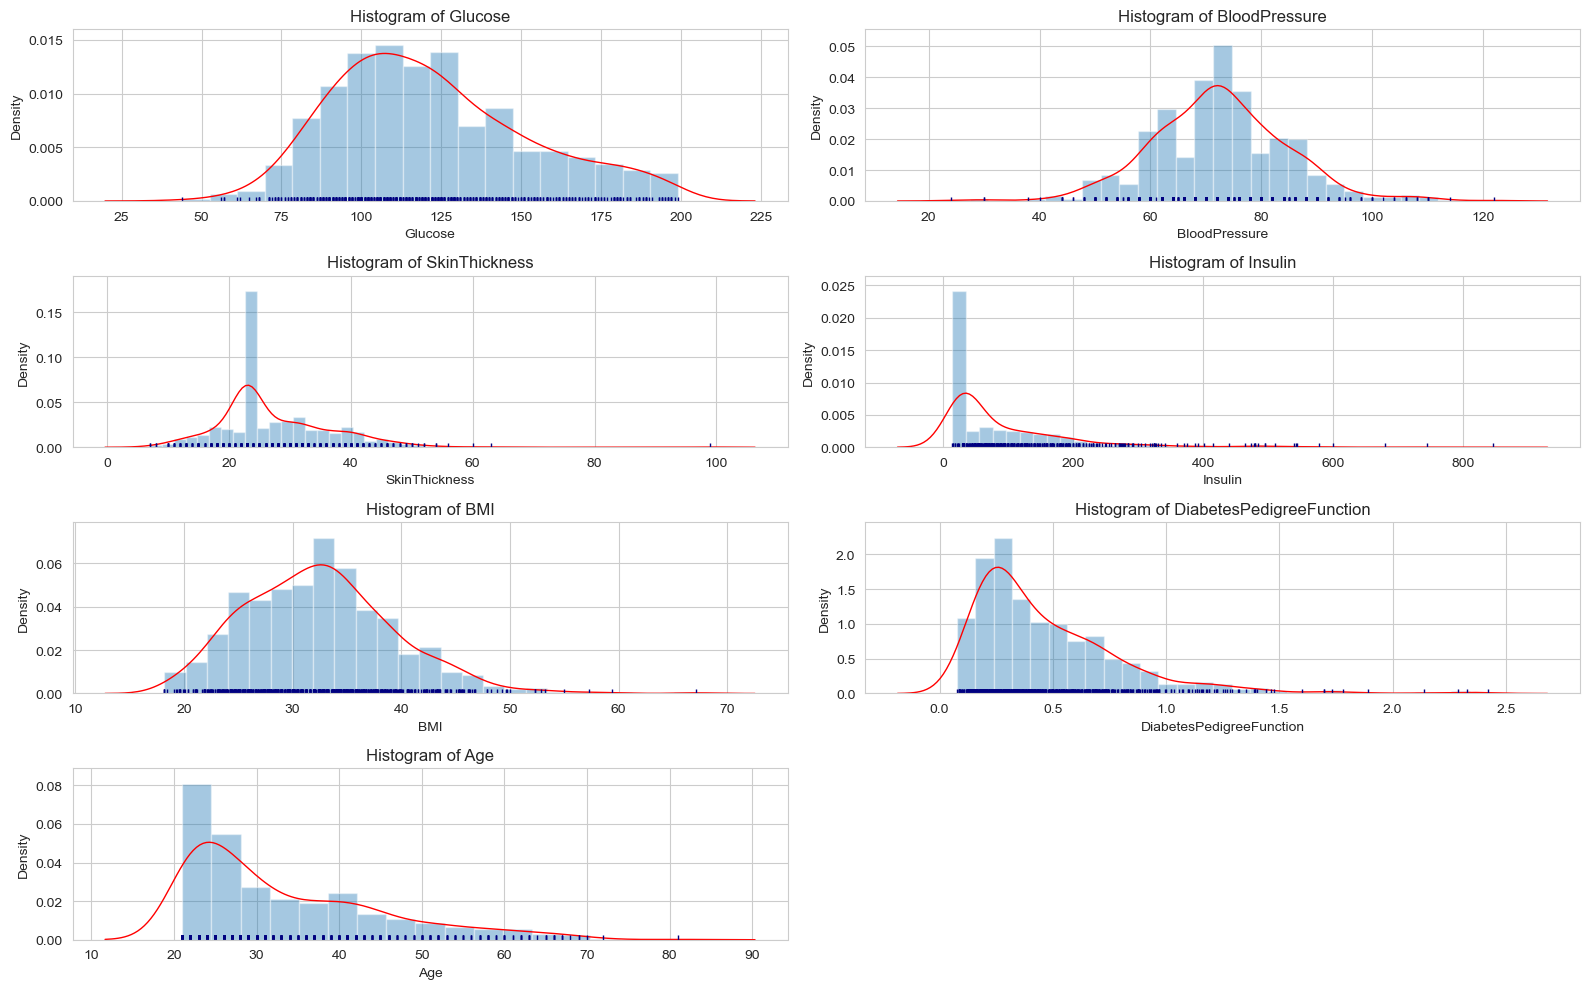

In [159]:
### We will plot histogram for above
plt.figure(figsize=(16,10))
sbn.set_style('whitegrid')
for ind,val in enumerate(health_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]):
    plt.subplot(4,2,ind+1)
    sbn.distplot(health_data[val],kde=True,kde_kws={'lw':1,'color':'red'},rug=True,rug_kws={'color':'navy'})
    plt.title("Histogram of "+val)
    plt.tight_layout()
    plt.savefig("Histograms_capstone.png")
    

In [160]:
# outlier treatment
for i in health_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]:
        q1=health_data[i].quantile(0.25)
        q3=health_data[i].quantile(0.75)
        iqr=q3-q1
        maxx=q3+1.5*iqr
        minn=q1-1.5*iqr
        for k in health_data[i]:
            if k>maxx:
                health_data[i].replace(k,maxx,inplace=True)
            elif k<minn:
                health_data[i].replace(k,minn,inplace=True)         

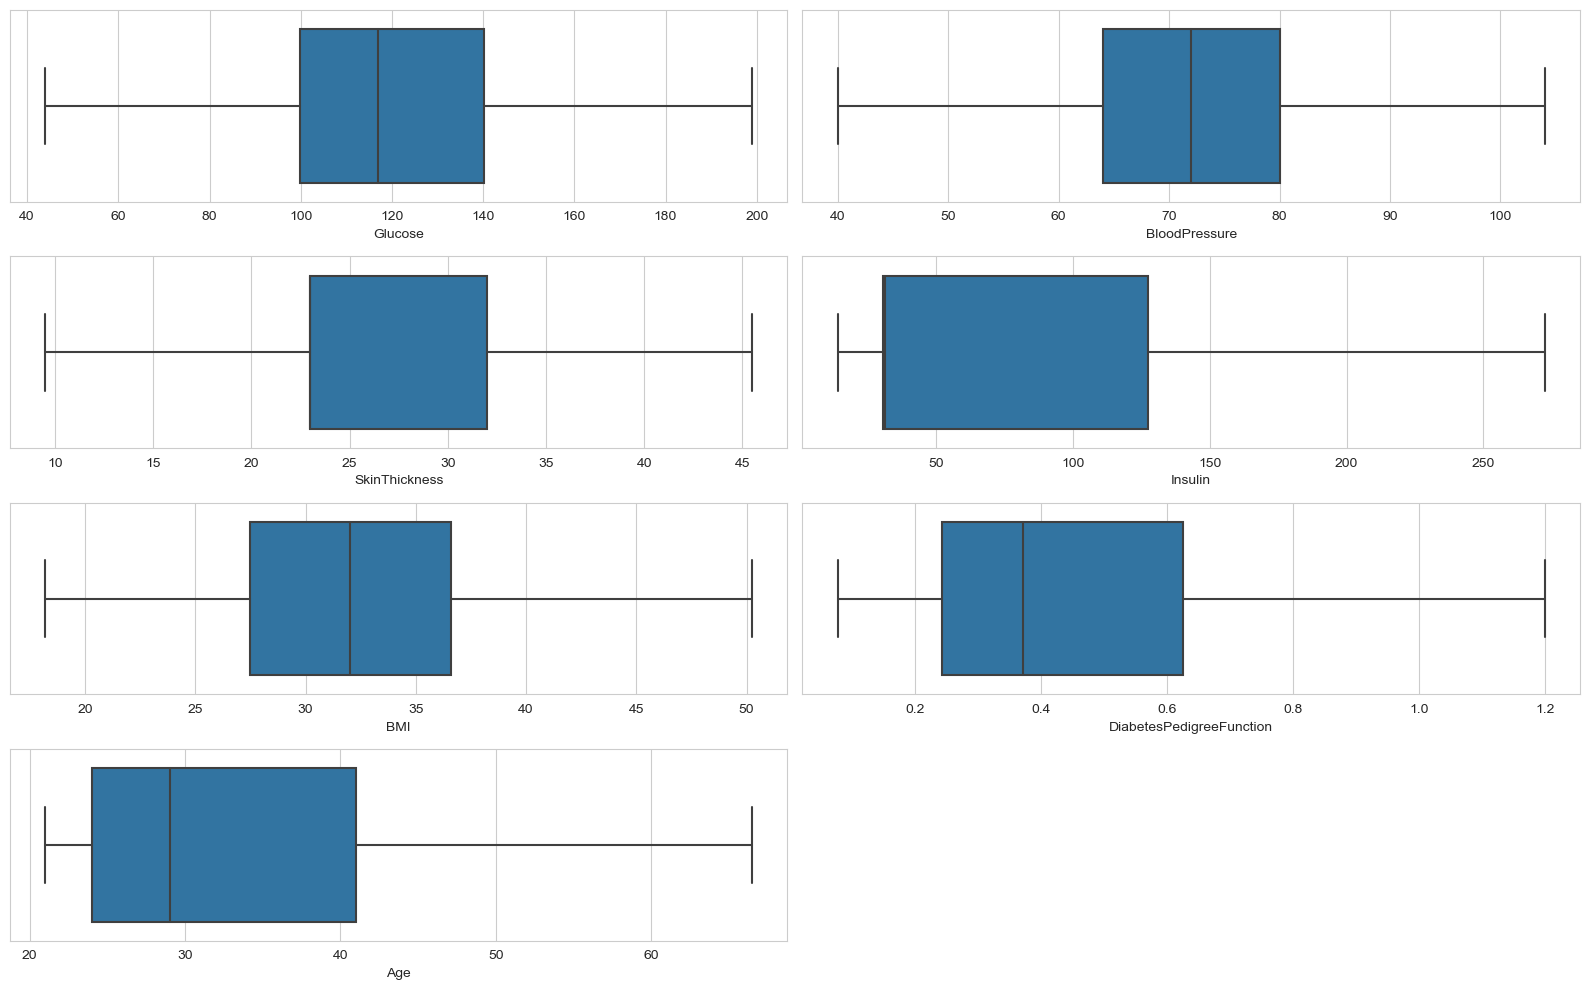

In [161]:
### We will plot box plots to see if data has any outliers
plt.figure(figsize=(16,10))
sbn.set_style('whitegrid')
for ind,val in enumerate(health_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]):
    plt.subplot(4,2,ind+1)
    sbn.boxplot(x=health_data[val])
    #plt.title("Histogram of "+val)
    plt.tight_layout()
    plt.savefig("boxplots_capstone.png")
    

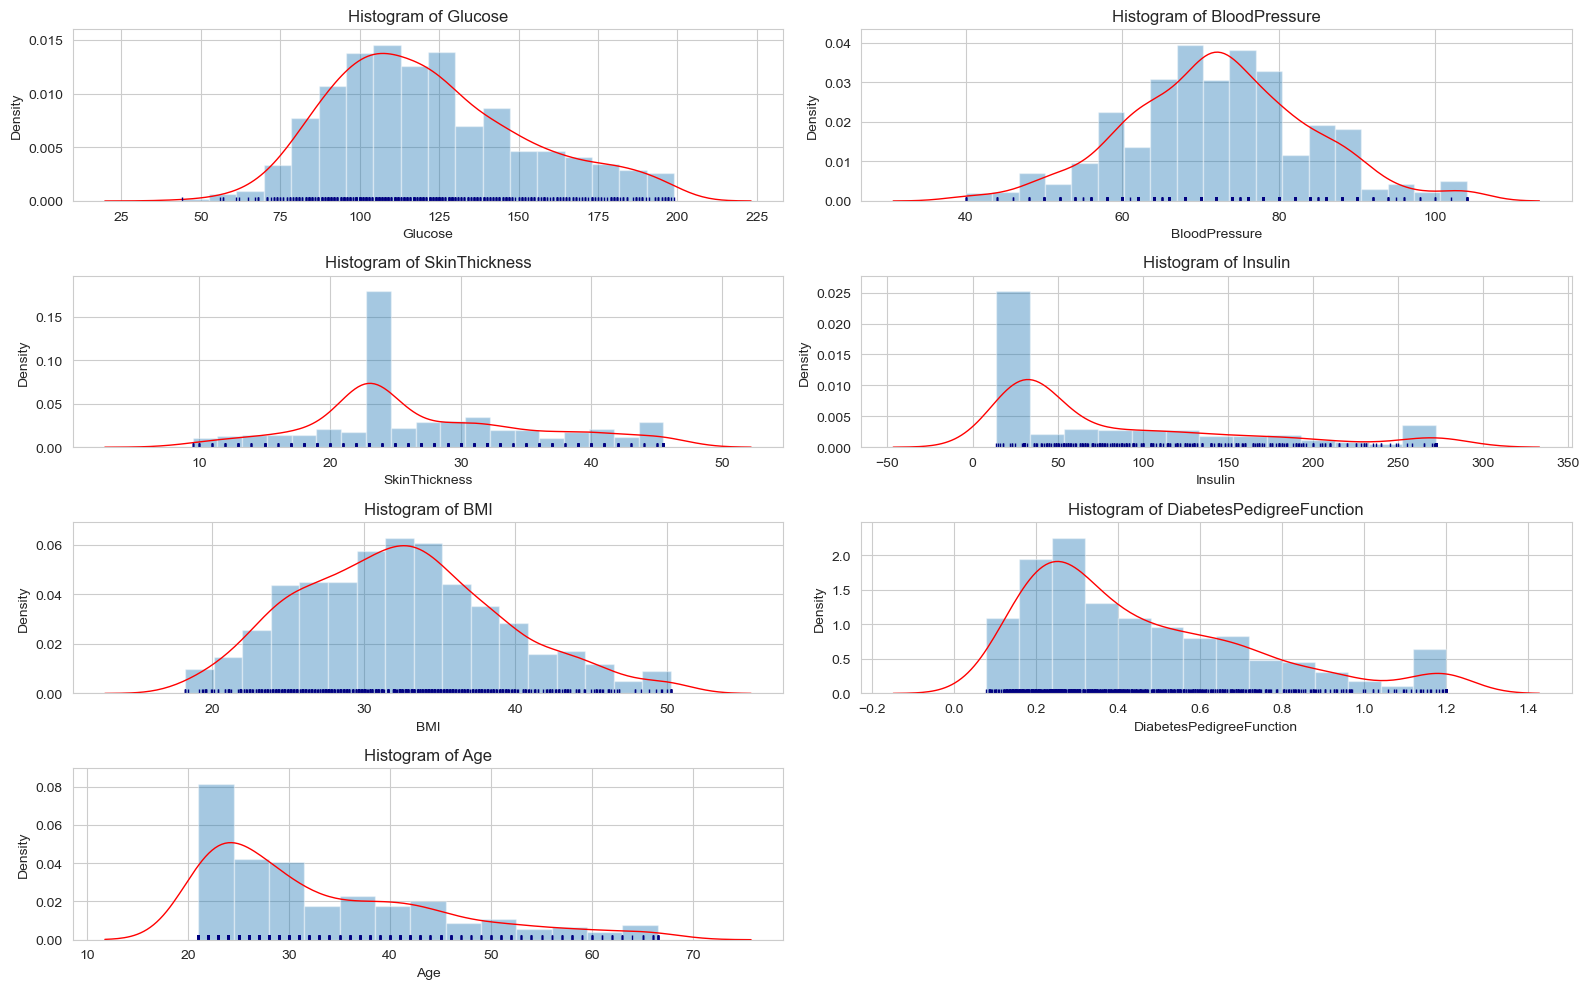

In [162]:
# We will plot histogram for above again to check the shapes after the outkier treatment
plt.figure(figsize=(16,10))
sbn.set_style('whitegrid')
for ind,val in enumerate(health_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]):
    plt.subplot(4,2,ind+1)
    sbn.distplot(health_data[val],kde=True,kde_kws={'lw':1,'color':'red'},rug=True,rug_kws={'color':'navy'})
    plt.title("Histogram of "+val)
    plt.tight_layout()
    plt.savefig("histogram_2_capstone.png")
    

### We will plot the pairplot to see the relationship between different features

<Figure size 3000x3000 with 0 Axes>

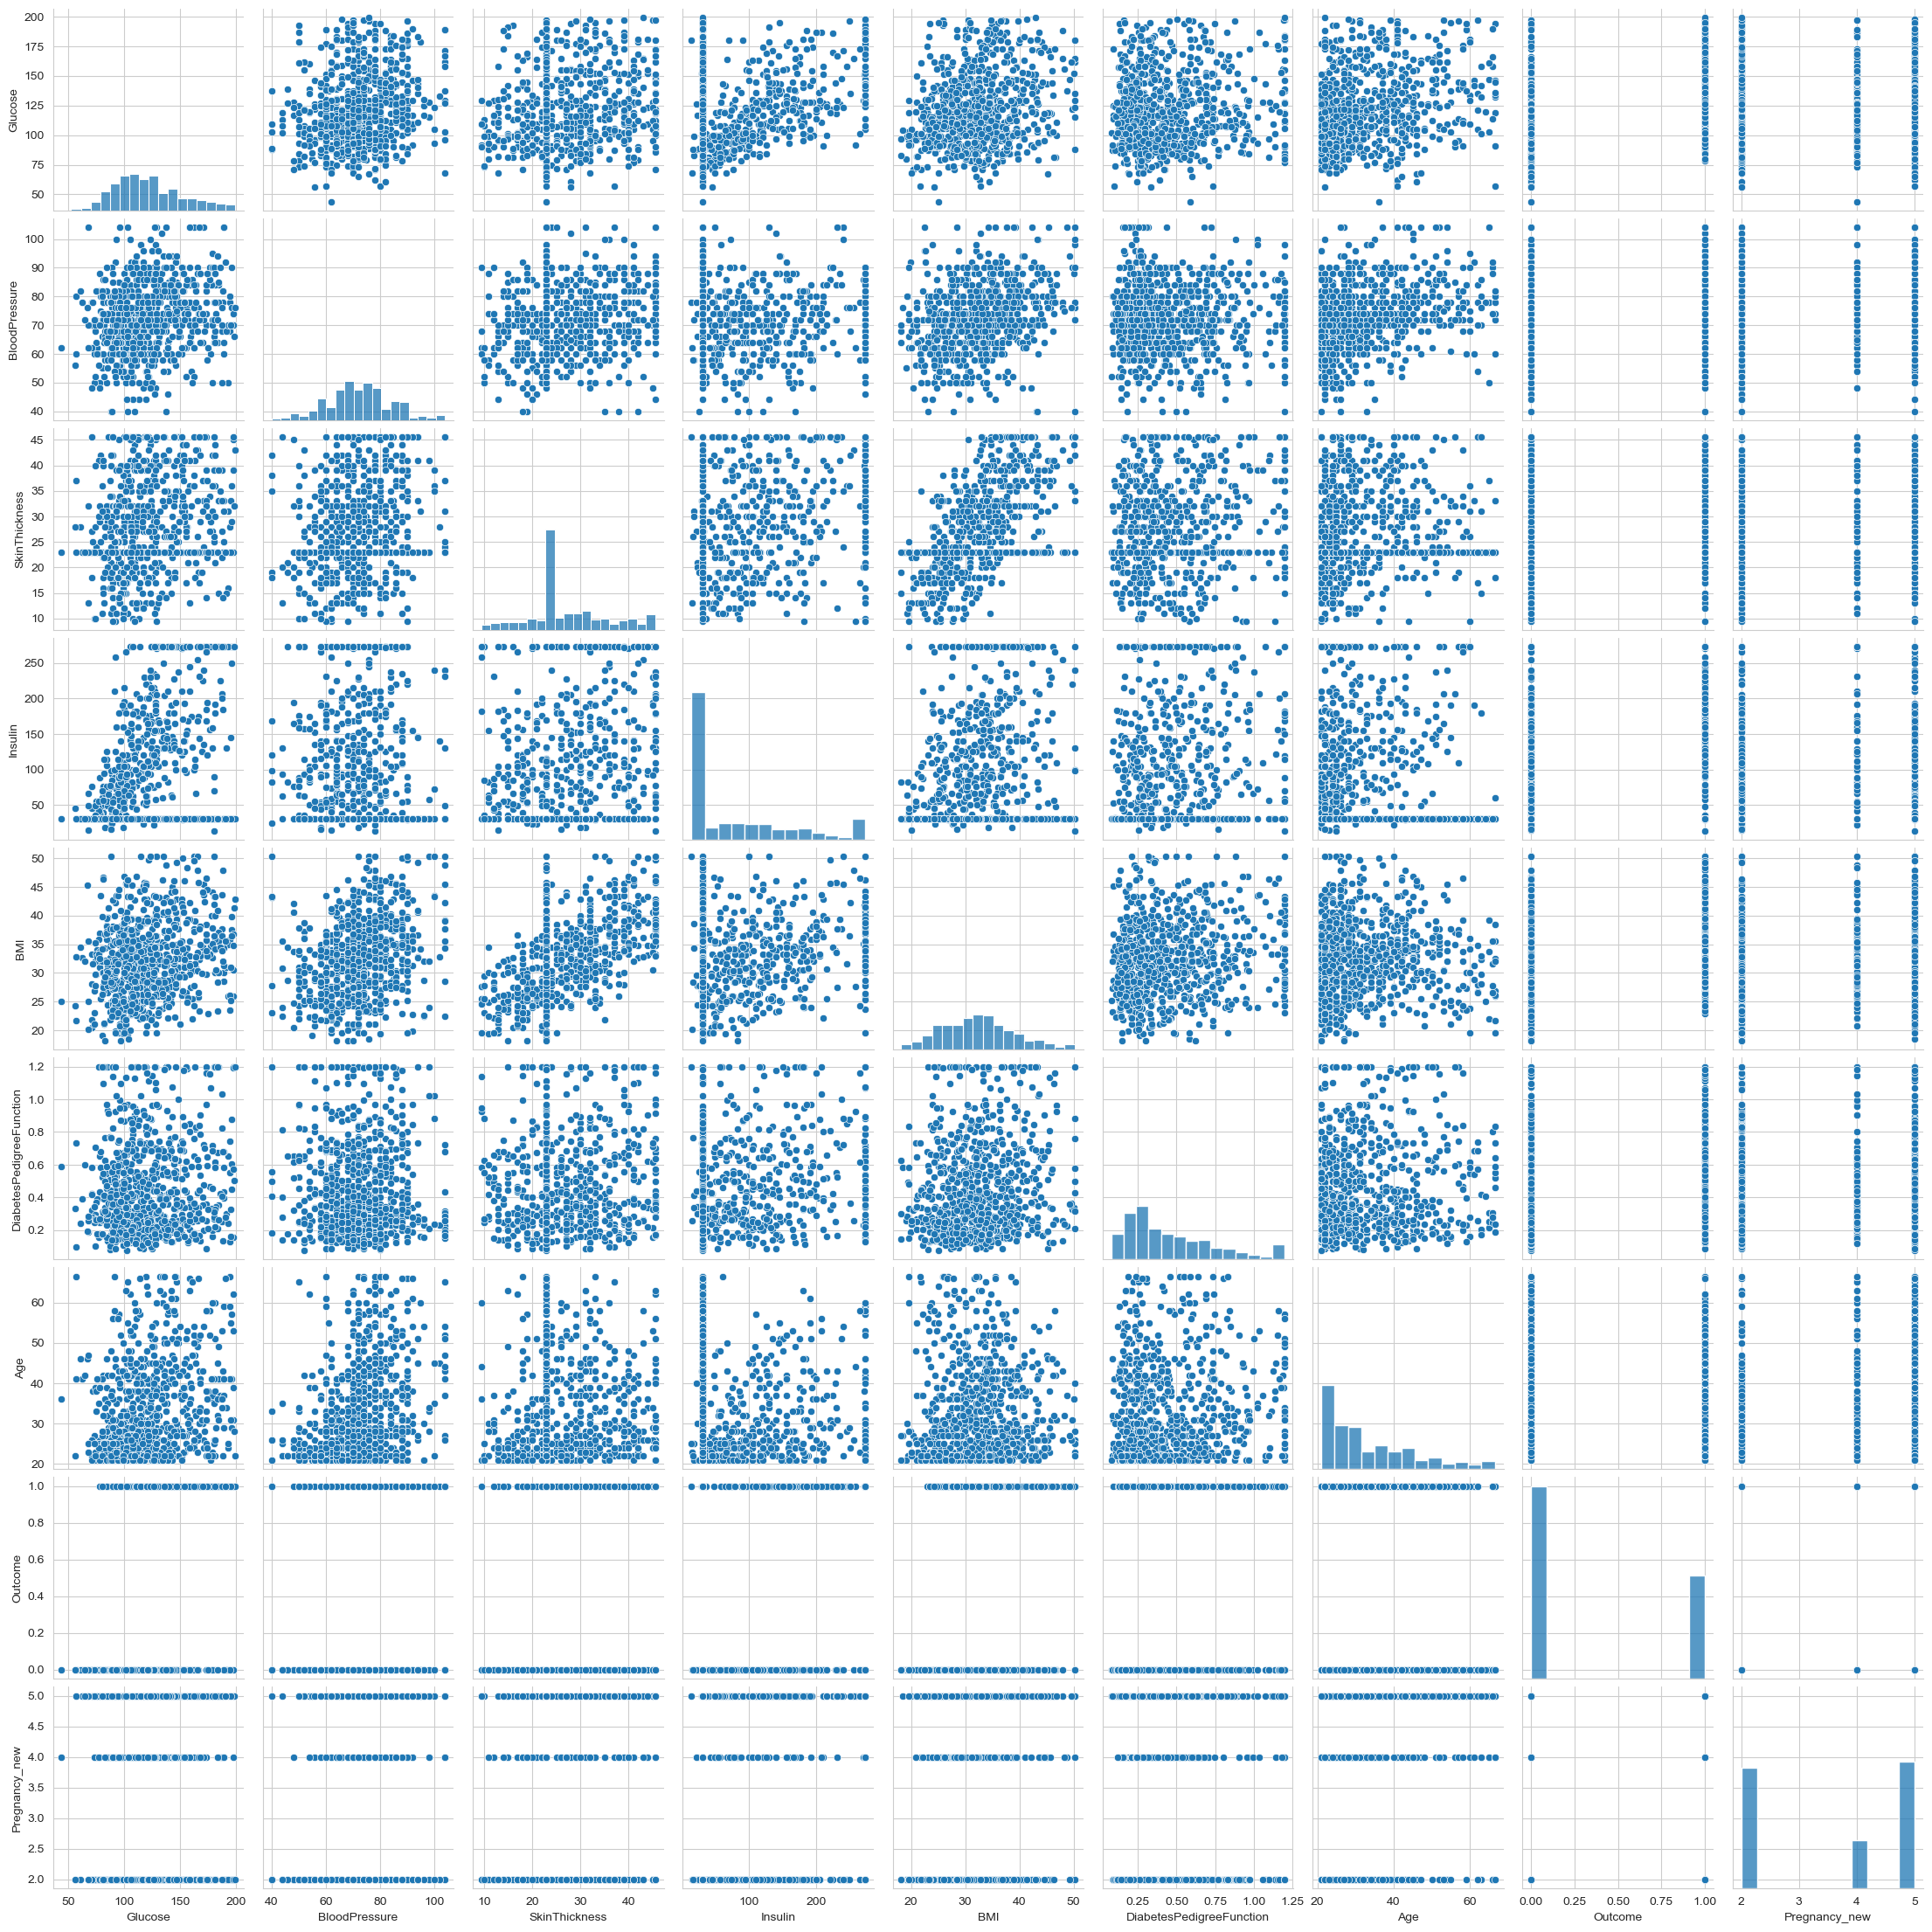

In [163]:
plt.figure(figsize=(30,30))
sbn.pairplot(health_data)
plt.savefig("pairplot.png")

### We will plot the heatmap to see the relationship between different features

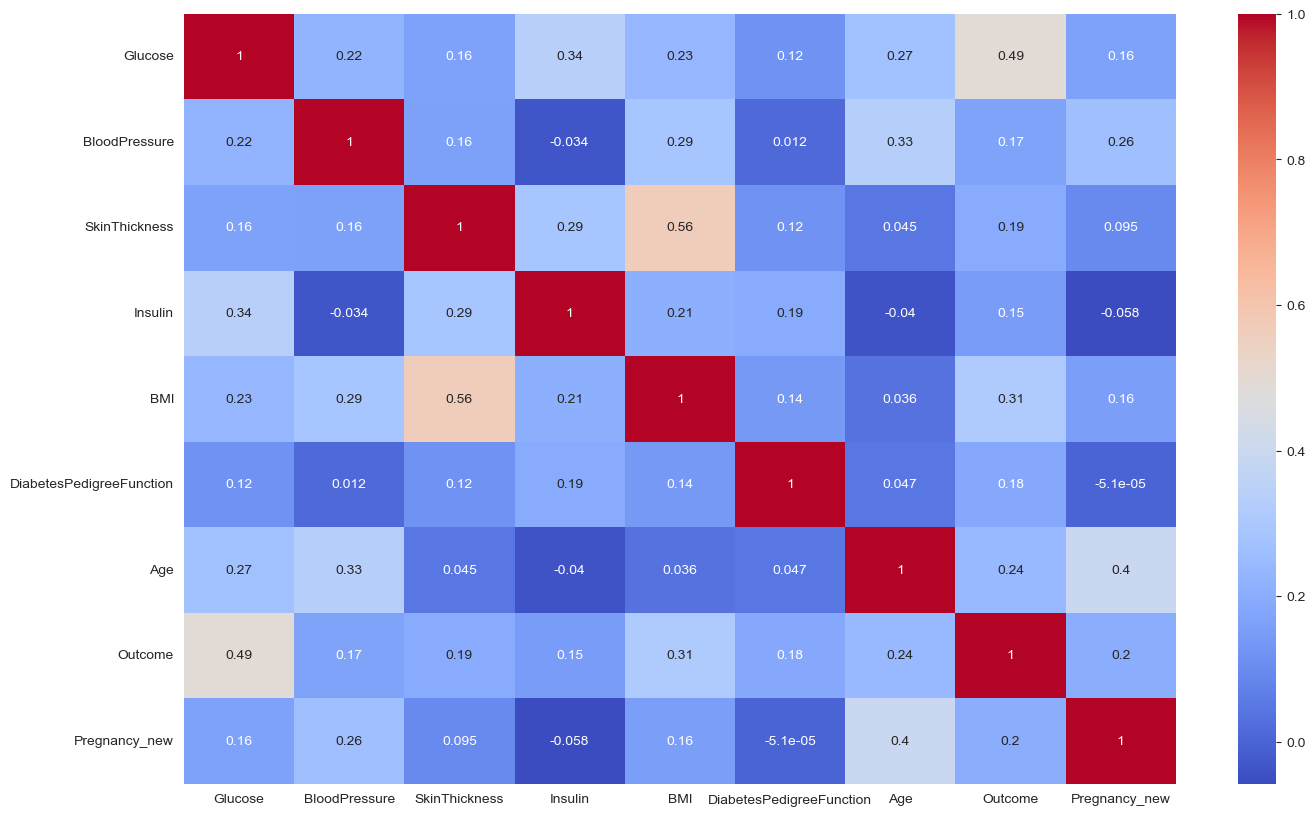

In [164]:
plt.figure(figsize=(16,10))
sbn.heatmap(health_data.corr(),cmap='coolwarm', annot=True,color='blue')
plt.savefig("heatmap.png")

# -----------------------Machine learning model building phase-----------------------

#### We will first check the data which we have is balanced or imbalanced with the help of a pie chart

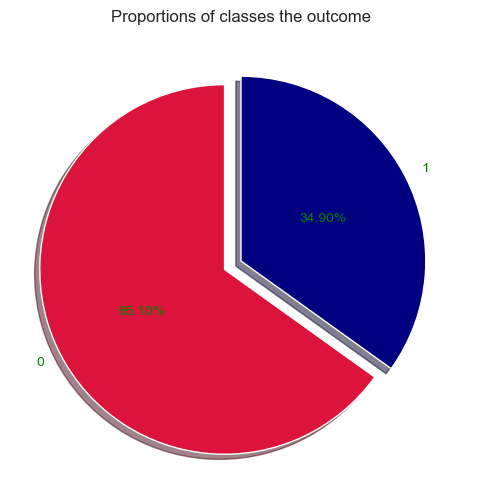

In [165]:
size=health_data['Outcome'].value_counts()
label=health_data['Outcome'].value_counts().index
explode=[0.1,0]
color=['crimson','navy']

plt.figure(figsize=(6,6))
plt.pie(size,labels=label,explode=explode,autopct='%1.2f%%',colors=color,shadow=True,startangle=90,pctdistance=0.5,textprops={'color':'green'})
plt.title("Proportions of classes the outcome")
plt.savefig("piechart.png")

#### The above pie chart shows that there is an imbalance in the data, we will handle this using hypermaramers for our algorithms and by oversampling and will compare the results 

## We will see how our data is seperated 

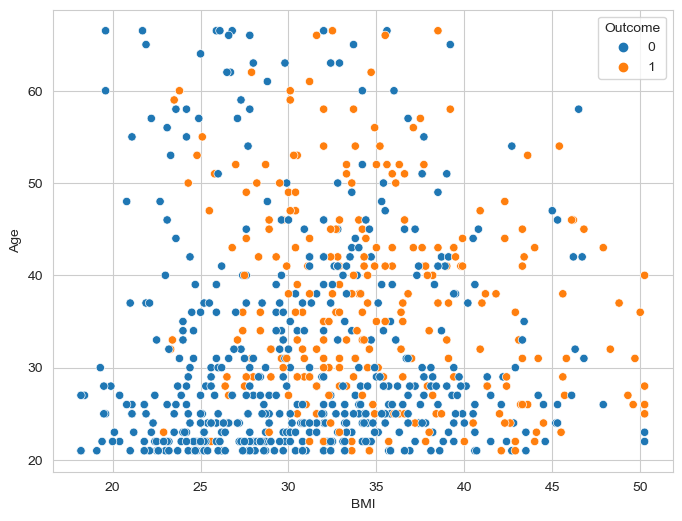

In [166]:
plt.figure(figsize=(8,6))
sbn.scatterplot(x= health_data['BMI'],y= health_data['Age'],hue=health_data['Outcome'])
plt.savefig("scatter_1.png")

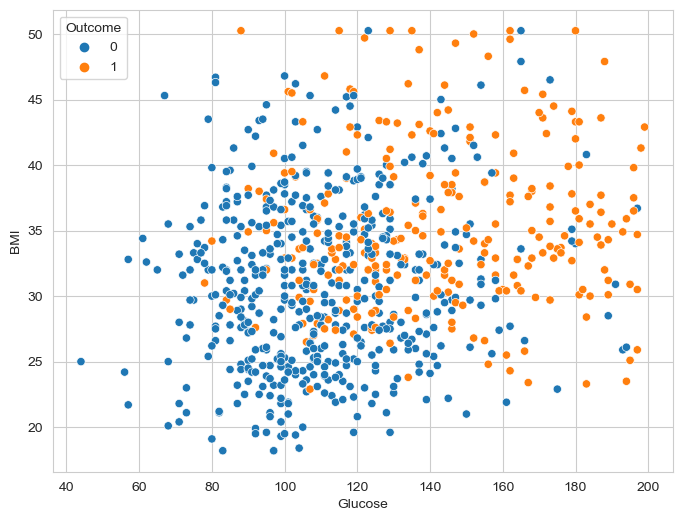

In [167]:
plt.figure(figsize=(8,6))
sbn.scatterplot(x= health_data['Glucose'],y= health_data['BMI'],hue=health_data['Outcome'])
plt.savefig("scatter_2.png")

#### 1)  The target variable in study is binary in nature, hence we can not use a regression machine learning algorithm.
#### 2)  We have to select the classification approach. 
#### 3)  We can see from above graphs the data is not linearly seperable , so logistic regression may not be a good choice though it is a bianry classification
#### 4)  We will still use logitic regression and other classification algorithms and will then compare the results

In [168]:
# Preparing the data for modelling- Seperating the target varaible and other independent variables

X=health_data.loc[ :, health_data.columns!='Outcome'].values
y=health_data['Outcome']

In [169]:
# Splitting the data into test and train 
x_train, x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# here, we are splitting the data in 80 to 20 ratio keeping the random state as 42

In [170]:
# creating an object of SMOTE

sm=SMOTE(random_state=42,sampling_strategy='minority')

x_train_sm, y_train_sm=sm.fit_resample(x_train,y_train)


In [171]:
# We will Scale the data
rbScaler=RobustScaler()
x_train_sm=rbScaler.fit_transform(x_train_sm)
x_test=rbScaler.transform(x_test)

### We will try different Machine learrning algorithms to see which is a better fit
### Since We need both,low FP and FN  , so will use F1 score as validation matrix

#### 1. Logistic regression

In [172]:
# Making an object of logistic regression
Lgr=LogisticRegression()

# We will use gridseachCV to get best parameters
# We tune hyperparametrs like  C,  fit_intercept, max_iter, solver ,penalty 
# We will use gridsearch cv for hyperparameter tuning.

In [173]:
# Making an object of GridsearchCV
# We will pass above mentioned parameters to the parm_grid disctionary which will be used for hyperparmetr tuning
# We will use F1 as scoring parameter.

param_grid={'penalty':['l1','l2','elasticnet',None],
            'C':np.logspace(-4,4,20),
            'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
            'fit_intercept':[True,False],
            'max_iter':[100,1000,500]
              }

# creating an object of GridsearchCV
Gscv=GridSearchCV(estimator=Lgr,param_grid=param_grid,scoring="f1",cv=3)

In [174]:
Gscv.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False],
                         'max_iter': [100, 1000, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='f1')

In [175]:
# We will check whar are the best parameters to use

print(Gscv.best_params_)
print(Gscv.best_score_)

{'C': 0.012742749857031334, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7772551992613858


              precision    recall  f1-score   support

           0       0.71      0.80      0.75        87
           1       0.69      0.57      0.62        67

    accuracy                           0.70       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.70      0.70      0.70       154

-----------------------------------------------------
-----------------------------------------------------
0.6229508196721312
ROC_AUC Score is  0.8145087235996327


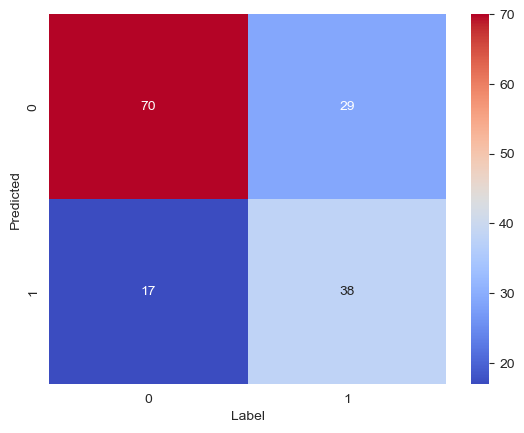

In [176]:
# We will train our model with above parameters
Lgr=LogisticRegression(C= 1.623776739188721, fit_intercept=True, penalty= 'l2', solver= 'liblinear',max_iter= 100)

#Fitting the dataset
Lgr.fit(x_train_sm, y_train_sm)

#Predicting the outcome using test dataset
Lgr_pred_test=Lgr.predict(x_test)

# Will check the clssifcattion report and confusion matrix
print(classification_report(Lgr_pred_test,y_test))
print("-----------------------------------------------------")
sbn.heatmap(confusion_matrix(y_test,Lgr_pred_test),cmap='coolwarm',annot=True)
plt.xlabel("Label")
plt.ylabel("Predicted")
plt.savefig("Heatmap_log.png")
print("-----------------------------------------------------")
print(f1_score(y_test,Lgr_pred_test))

log_reg_prob=Lgr.predict_proba(x_test)[:,1]
log_fpr,log_tpr,log_thresholds=roc_curve(y_test,log_reg_prob)
print("ROC_AUC Score is ",roc_auc_score(y_test,log_reg_prob))

#### 2. Support vector machines

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        84
           1       0.76      0.60      0.67        70

    accuracy                           0.73       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.74      0.73      0.73       154

-----------------------------------------------------
-----------------------------------------------------
F1 SCORE is  0.6719999999999999
ROC_AUC Score is,  0.5


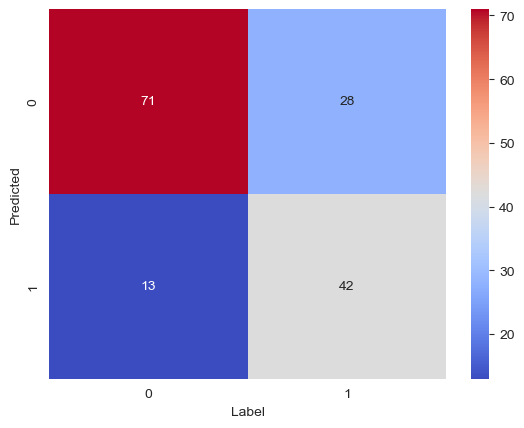

In [189]:
# making an object of support vector machines classifier
# We tune hyperparametrs like  kernel,gama and C
svclass=SVC(kernel='rbf',C=0.01,gamma=0.001,probability=True)

# Fitting the dataset
svclass.fit(x_train_sm, y_train_sm)

# Predicting the outcome using test dataset
svclass_pred_test=svclass.predict(x_test)

# Will check the clssifcattion report and confusion matrix
print(classification_report(svclass_pred_test,y_test))
print("-----------------------------------------------------")
sbn.heatmap(confusion_matrix(y_test,svclass_pred_test),cmap='coolwarm',annot=True)
plt.xlabel("Label")
plt.ylabel("Predicted")
plt.savefig("Heatmap_svc.png")
print("-----------------------------------------------------")
svc_prob=svclass.predict_proba(x_test)[:,1]
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,svc_prob)

print("F1 SCORE is ",f1_score(y_test,svclass_pred_test))
print("ROC_AUC Score is, ", roc_auc_score(y_test,svc_prob))

#### 3. Random forrest

In [178]:
# making an object of Random Forrest classifier
Rmf=RandomForestClassifier()

# We will use gridseachCV to get best parameters
# We tune hyperparametrs like  n_estimators, max_depth, max_features etc
# We will use gridsearch cv for hyperparameter tuning.

In [179]:
# Making an object of GridsearchCV
# We will pass above mentioned parameters to the parm_grid disctionary which will be used for hyperparmetr tuning
# We will use F1 as scoring parameter.

param_grid_rmf={'n_estimators':[i for i in range(1,101,10) ],
               'max_depth':[2,4,6,8],
               'max_features':['auto','sqrt'],
                'random_state':[42,100]
               
              }

# creating an object of GridsearchCV
Gscv=GridSearchCV(estimator=Rmf,param_grid=param_grid_rmf,scoring="f1",cv=3,n_jobs=5)
# Fitting the data
Gscv.fit(x_train_sm, y_train_sm)

# We will check whar are the best parameters to use

print(Gscv.best_params_)
print(Gscv.best_score_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 41, 'random_state': 100}
0.8321380371304777


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        86
           1       0.82      0.66      0.73        68

    accuracy                           0.79       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.79      0.79      0.78       154

-----------------------------------------------------
-----------------------------------------------------
0.7317073170731708
ROC_AUC Score is  0.8280991735537189


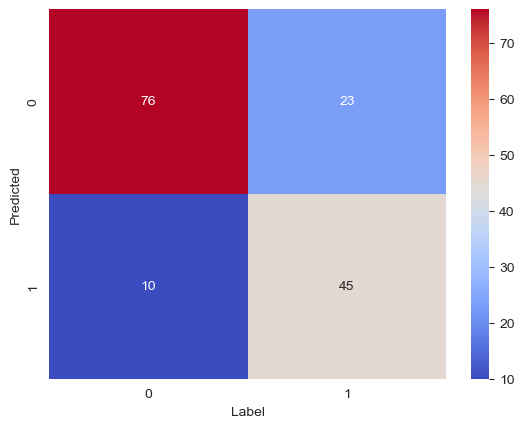

In [180]:
# We will train our model with above parameters
Rmf=RandomForestClassifier(max_depth=8, max_features= 'auto', n_estimators=41,random_state=100)

#Fitting the dataset
Rmf.fit(x_train_sm, y_train_sm)

#Predicting the outcome using test dataset
Rmf_pred_test=Rmf.predict(x_test)

# Will check the clssifcattion report and confusion matrix
print(classification_report(Rmf_pred_test,y_test))
print("-----------------------------------------------------")
sbn.heatmap(confusion_matrix(y_test,Rmf_pred_test),cmap='coolwarm',annot=True)
plt.xlabel("Label")
plt.ylabel("Predicted")
plt.savefig("heatmap_Randomforrest.png")
print("-----------------------------------------------------")
print(f1_score(y_test,Rmf_pred_test))

rf_prob=Rmf.predict_proba(x_test)[:,1]
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,rf_prob)
print("ROC_AUC Score is ",roc_auc_score(y_test,rf_prob))

#### 4. NaiveBayes 

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        86
           1       0.75      0.60      0.67        68

    accuracy                           0.73       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.74      0.73      0.73       154

-----------------------------------------------------
-----------------------------------------------------
0.6666666666666666
ROC_AUC Score is  0.8343434343434344


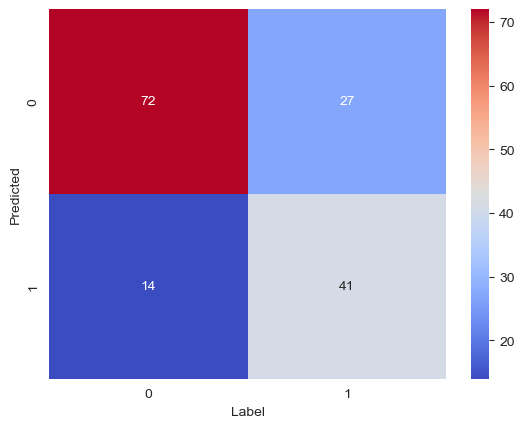

In [181]:
# making an object of GaussianNb classifier
gnb=GaussianNB()

#Fitting the dataset
gnb.fit(x_train_sm, y_train_sm)

#Predicting the outcome using test dataset
gnb_pred_test=gnb.predict(x_test)

# Will check the clssifcattion report and confusion matrix
print(classification_report(gnb_pred_test,y_test))
print("-----------------------------------------------------")
sbn.heatmap(confusion_matrix(y_test,gnb_pred_test),cmap='coolwarm',annot=True)
plt.xlabel("Label")
plt.ylabel("Predicted")
plt.savefig("Heatmap_naive.png")
print("-----------------------------------------------------")
print(f1_score(y_test,gnb_pred_test))

Nb_prob=gnb.predict_proba(x_test)[:,1]
nb_fpr,nb_tpr,nb_threshold=roc_curve(y_test,Nb_prob)
print("ROC_AUC Score is ",roc_auc_score(y_test,Nb_prob))

#### 5. KNeighboursClassifier

In [182]:
# making an object of Random Forrest classifier
knc=KNeighborsClassifier()

# We will use gridseachCV to get best parameters
# We tune hyperparametrs like  n_neighbours, weights, algorithm
# We will use gridsearch cv for hyperparameter tuning.

In [183]:
# Making an object of GridsearchCV
# We will pass above mentioned parameters to the parm_grid disctionary which will be used for hyperparmetr tuning
# We will use F1 as scoring parameter.

param_grid_knn={'n_neighbors':[5,7,9,11,15],
               'weights':['uniform','distance'],
               'algorithm':['brute','auto'],
                'p':[1,2]
              }

# creating an object of GridsearchCV
Gscv=GridSearchCV(estimator=knc,param_grid=param_grid_knn,scoring="f1",cv=3,n_jobs=5)
# Fitting the data
Gscv.fit(x_train_sm, y_train_sm)

# We will check what are the best parameters to use

print(Gscv.best_params_)
print(Gscv.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
0.8310227229857108


              precision    recall  f1-score   support

           0       0.65      0.81      0.72        79
           1       0.73      0.53      0.62        75

    accuracy                           0.68       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.69      0.68      0.67       154

-----------------------------------------------------
-----------------------------------------------------
0.6153846153846153
ROC_AUC Score is  0.7401285583103765


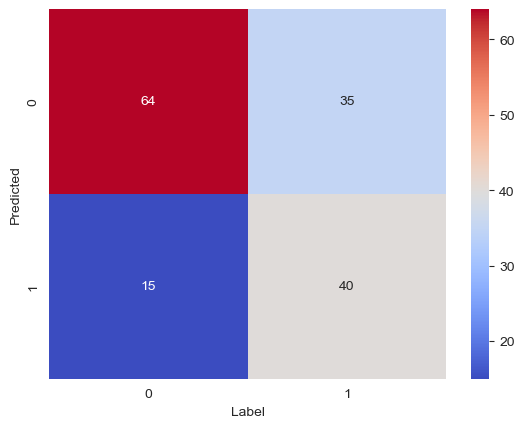

In [184]:
# making an object of KNeighborsClassifier with above parameters
knc=KNeighborsClassifier(algorithm= 'brute', n_neighbors= 5, p=1, weights='distance')

#Fitting the dataset
knc.fit(x_train_sm, y_train_sm)

#Predicting the outcome using test dataset
knc_pred_test=knc.predict(x_test)

# Will check the clssifcattion report and confusion matrix
print(classification_report(knc_pred_test,y_test))
print("-----------------------------------------------------")
sbn.heatmap(confusion_matrix(y_test,knc_pred_test),cmap='coolwarm',annot=True)
plt.xlabel("Label")
plt.ylabel("Predicted")
plt.savefig("k_neighbour.png")
print("-----------------------------------------------------")
print(f1_score(y_test,knc_pred_test))
knc_prob=knc.predict_proba(x_test)[:,1]
knc_fpr,knc_tpr,knc_threshold=roc_curve(y_test,knc_prob)
print("ROC_AUC Score is ",roc_auc_score(y_test,knc_prob))

### We will plot ROC_AUC curves for our classifiers

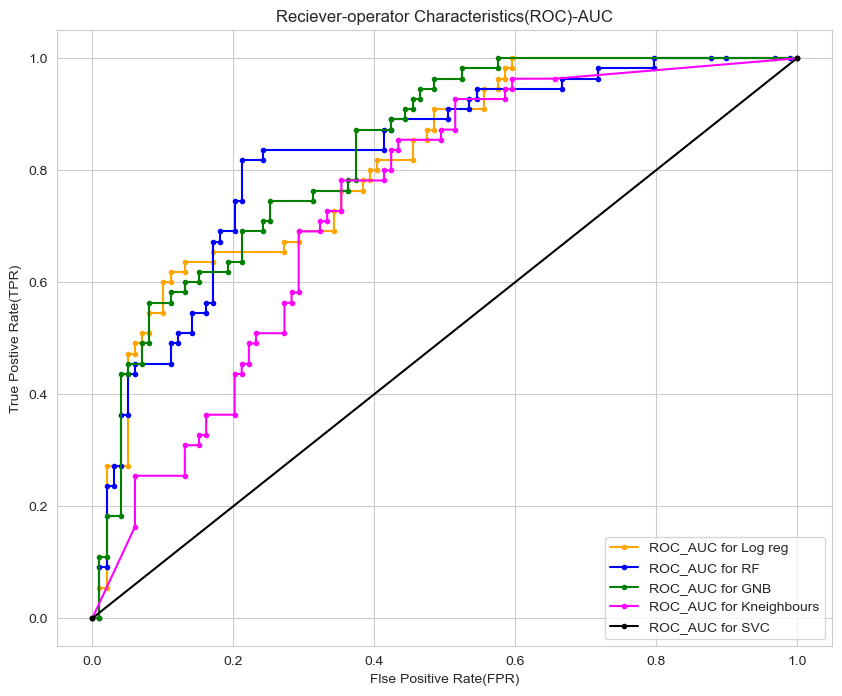

In [188]:
plt.figure(figsize=(10,8))
plt.plot(log_fpr,log_tpr,marker='.' ,color='orange',label="ROC_AUC for Log reg")
plt.plot(rf_fpr,rf_tpr,marker='.' ,color='blue',label="ROC_AUC for RF")
plt.plot(nb_fpr,nb_tpr,marker='.' ,color='green',label="ROC_AUC for GNB")
plt.plot(knc_fpr,knc_tpr,marker='.' ,color='magenta',label="ROC_AUC for Kneighbours")
plt.plot(svc_fpr,svc_tpr,marker='.' ,color='black',label="ROC_AUC for SVC")
plt.xlabel("Flse Positive Rate(FPR)")
plt.ylabel("True Postive Rate(TPR)")
plt.title("Reciever-operator Characteristics(ROC)-AUC")
plt.legend(loc='lower right')
plt.savefig("ROC_AUC.png")

In [186]:
Comparison=pd.DataFrame({'F1 Score':[f1_score(y_test,Lgr_pred_test),f1_score(y_test,svclass_pred_test),f1_score(y_test,Rmf_pred_test)
                                     ,f1_score(y_test,gnb_pred_test),f1_score(y_test,knc_pred_test)],
                        'ROC_AUC Score':[roc_auc_score(y_test,log_reg_prob), roc_auc_score(y_test,svc_prob),roc_auc_score(y_test,rf_prob),roc_auc_score(y_test,Nb_prob),roc_auc_score(y_test,knc_prob)]},
                         index=['Logistic regression','SVC','Random Forrest','Naive Bayes','KNeighborsClassifier'])

In [187]:
Comparison

,F1 Score,ROC_AUC Score
Logistic regression,0.622951,0.814509
SVC,0.672000,0.500000
Random Forrest,0.731707,0.828099
Naive Bayes,0.666667,0.834343
KNeighborsClassifier,0.615385,0.740129


# Conslusion: 

## After the evaluation of above Classification algorithms, Random Forrest has performed the best among all these algorithms